<a href="https://colab.research.google.com/github/NsiriRoua/MNIST/blob/main/Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


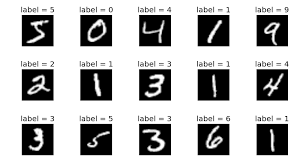


Dataset called MNIST which has items of handwriting -- the digits 0 through 9



In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


**My callback class**

In [2]:
class my_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.99):
      print('\n Reached 99% of accuaracy so stop training !')
      self.model.stop_training=True

**Load the data**

In [30]:
mnist=tf.keras.datasets.mnist
(training_images,training_labels),(testing_images,testing_labes)=mnist.load_data()

In [32]:
print(testing_images.shape)
print(testing_labels.size)

(10000, 28, 28)
60000


5


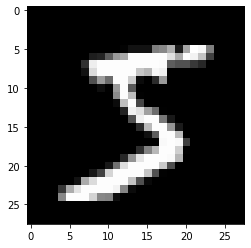

In [10]:
plt.imshow(training_images[0],cmap='gray')
print(training_labels[0])

**Data Preprocessing**

In [11]:
training_images=training_images/255.0
testing_images=testing_images/255.0

In [12]:
print(training_images.shape)

(60000, 28, 28)


In [15]:
print(training_labels.size)

60000


In [21]:
print(len(np.unique(training_labels)))

10


# **Neural Network Construction**

**Define the architecture**

In [22]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                ])

**Compile our model**

In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


**Fit our model**

In [27]:
callbacks=my_callback()
model.fit(training_images,training_labels,epochs=10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3385 - accuracy: 0.9023
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0839 - accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0485 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0339 - accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0239 - accuracy: 0.9925

 Reached 99% of accuaracy so stop training !
